Converged in 154 iterations.
Temperature at the middle of the block: 117.33 K


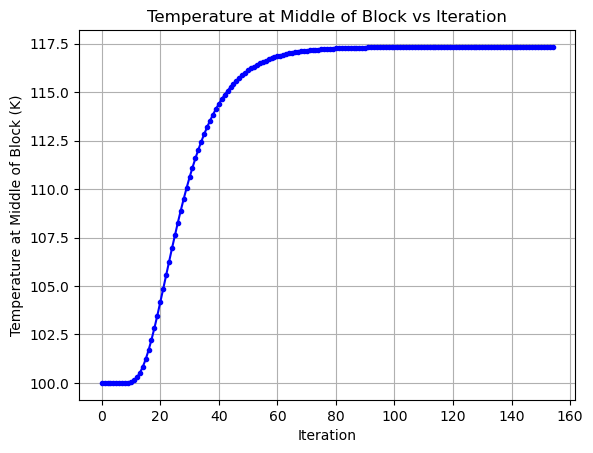

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Dimensions of the block
Lx = 0.2
Ly = 0.1
Lz = 0.1

# Number of grid points
nx = 20
ny = 10
nz = 10

# Grid spacing
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)
dz = Lz / (nz - 1)
 
# Thermal conductivity (W/m·K)
k = 385 

# Initialize temperature array
T = np.full((nx, ny, nz), 100.0)  # Initial temperature of 100 K

# Boundary condition: face at x = Lx 
T[-1, :, :] = 1000.0

# Tolerance and max number of iterations
tol = 1e-5
max_iter = 10000

# Store temperature at the middle of the block for each iteration
middle_temps = []

# Finite difference iteration (Gauss-Seidel method)
for it in range(max_iter):
    T_old = T.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            for k in range(1, nz-1):
                T[i, j, k] = (1/6) * (T[i+1, j, k] + T[i-1, j, k] +
                                      T[i, j+1, k] + T[i, j-1, k] +
                                      T[i, j, k+1] + T[i, j, k-1])
    
    # Store the temperature at the middle of the block
    middle_temp = T[nx//2, ny//2, nz//2]
    middle_temps.append(middle_temp)
    
    # Check for convergence
    if np.max(np.abs(T - T_old)) < tol:
        print(f'Converged in {it} iterations.')
        break
else:
    print('Did not converge within the maximum number of iterations.')

# Temperature at the middle of the block
print(f'Temperature at the middle of the block: {middle_temp:.2f} K')

# Temperature at the middle of the block vs Iterations
plt.plot(middle_temps, 'b-', marker='.')
plt.xlabel('Iteration')
plt.ylabel('Temperature at Middle of Block (K)')
plt.title('Temperature at Middle of Block vs Iteration')
plt.grid(True)
plt.show()